#  Importing library functions and modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import sklearn
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures,StandardScaler # try not use
from sklearn.model_selection import train_test_split,KFold,cross_val_score,ShuffleSplit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,f1_score,accuracy_score
from sklearn import tree
# from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from mlxtend.plotting import plot_learning_curves


# EDA : 

In [2]:
df=pd.read_csv('main_data_set.csv')

In [3]:
df.head(10)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,country+province,Lat,Long,day_from_jan_first,...,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0,Afghanistan-,33.0,65.0,22,...,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4,0.00,0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0,Afghanistan-,33.0,65.0,23,...,32.7,55.9,999.9,1020.8,22.8,0.461259,0.163225,14.9,99.99,1
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0,Afghanistan-,33.0,65.0,24,...,36.9,43.2,999.9,1018.6,34.5,0.801794,0.325375,10.4,0.17,1
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0,Afghanistan-,33.0,65.0,25,...,37.9,56.3,999.9,1018.0,37.8,0.728175,0.214562,6.1,0.57,1
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0,Afghanistan-,33.0,65.0,26,...,36.1,53.1,999.9,1014.8,33.2,0.685513,0.231656,10.8,0.00,1
5,6,NaN,Afghanistan,2020-01-27,0.0,0.0,Afghanistan-,33.0,65.0,27,...,36.5,50.7,999.9,1015.7,35.6,0.748685,0.250325,3.7,0.04,0
6,7,NaN,Afghanistan,2020-01-28,0.0,0.0,Afghanistan-,33.0,65.0,28,...,34.7,48.2,999.9,1016.9,34.7,0.759514,0.273882,2.4,0.00,0
7,8,NaN,Afghanistan,2020-01-29,0.0,0.0,Afghanistan-,33.0,65.0,29,...,13.3,16.9,774.1,1024.7,0.2,0.509437,-0.035773,2.4,0.00,0
8,9,NaN,Afghanistan,2020-01-30,0.0,0.0,Afghanistan-,33.0,65.0,30,...,13.3,16.9,774.1,1024.7,0.2,0.509437,-0.035773,2.4,0.00,0
9,10,NaN,Afghanistan,2020-01-31,0.0,0.0,Afghanistan-,33.0,65.0,31,...,4.8,7.7,774.4,1031.0,-0.6,0.751688,-0.021931,1.9,0.00,1


In [4]:
df.describe()

,Id,ConfirmedCases,Fatalities,Lat,Long,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
count,22644.000000,22644.000000,22644.000000,22644.000000,22644.000000,22644.000000,22644.000000,22520.000000,22606.000000,22644.000000,13518.000000,22040.000000,22040.000000,2.204000e+04,22644.000000,22644.000000,22644.000000
mean,16355.000000,655.267002,29.015412,24.833541,4.598104,58.500000,57.102270,47.894516,66.567690,727.236849,1016.194563,44.210227,0.658011,inf,24.796463,7.863050,0.332627
std,9451.983632,5428.632429,382.138505,23.268712,79.184595,21.360481,22.283599,22.892130,22.164222,416.852926,8.240169,22.406702,0.193358,NaN,133.465712,26.796735,0.471165
min,1.000000,0.000000,0.000000,-41.454500,-157.498300,22.000000,-33.600000,-45.400000,-20.200000,0.000000,968.900000,-40.200000,0.035440,-2.374315e+01,0.000000,0.000000,0.000000
25%,8169.750000,0.000000,0.000000,12.169600,-71.511800,40.000000,40.200000,31.600000,49.150000,570.175000,1011.000000,28.200000,0.558287,1.222999e-01,3.700000,0.000000,0.000000
50%,16355.000000,0.000000,0.000000,31.027250,10.470400,58.500000,58.300000,48.200000,69.100000,982.700000,1015.400000,43.300000,0.697362,1.918442e-01,5.800000,0.000000,0.000000
75%,24540.250000,51.000000,0.000000,42.011500,57.000000,77.000000,78.200000,69.600000,86.000000,999.900000,1021.000000,66.000000,0.793084,2.293303e-01,8.700000,0.030000,1.000000
max,32709.000000,126168.000000,15362.000000,64.963100,178.450000,95.000000,98.000000,88.700000,113.200000,999.900000,1051.700000,81.200000,1.000000,inf,999.900000,99.990000,1.000000


In [5]:
df.dtypes

Id                      int64
Province_State         object
Country_Region         object
Date                   object
ConfirmedCases        float64
Fatalities            float64
country+province       object
Lat                   float64
Long                  float64
day_from_jan_first      int64
temp                  float64
min                   float64
max                   float64
stp                   float64
slp                   float64
dewp                  float64
rh                    float64
ah                    float64
wdsp                  float64
prcp                  float64
fog                     int64
dtype: object

# Data cleansing and preparation  :

In [6]:
df.isnull().sum()

Id                        0
Province_State        13024
Country_Region            0
Date                      0
ConfirmedCases            0
Fatalities                0
country+province          0
Lat                       0
Long                      0
day_from_jan_first        0
temp                      0
min                     124
max                      38
stp                       0
slp                    9126
dewp                    604
rh                      604
ah                      604
wdsp                      0
prcp                      0
fog                       0
dtype: int64

In [7]:
df_copy=df.copy()

In [8]:
df['rh']=df['rh'].interpolate()
df['dewp']=df['dewp'].interpolate()
df['min']=df['max'].interpolate()
df['max']=df['max'].interpolate()
df['slp']=df['slp'].interpolate()
df['ah']=df['ah'].interpolate()



In [9]:
df=df.rename(columns={'Country_Region':'country' , 'ConfirmedCases':'cases' , 'Fatalities':'Deaths' })

In [10]:
del df['Province_State']
del df['country+province']
del df['Id']
del df['day_from_jan_first']
del df['ah']
del df['country']
del df['Date']

# del df['min']
# del df['max']

# Visualization :

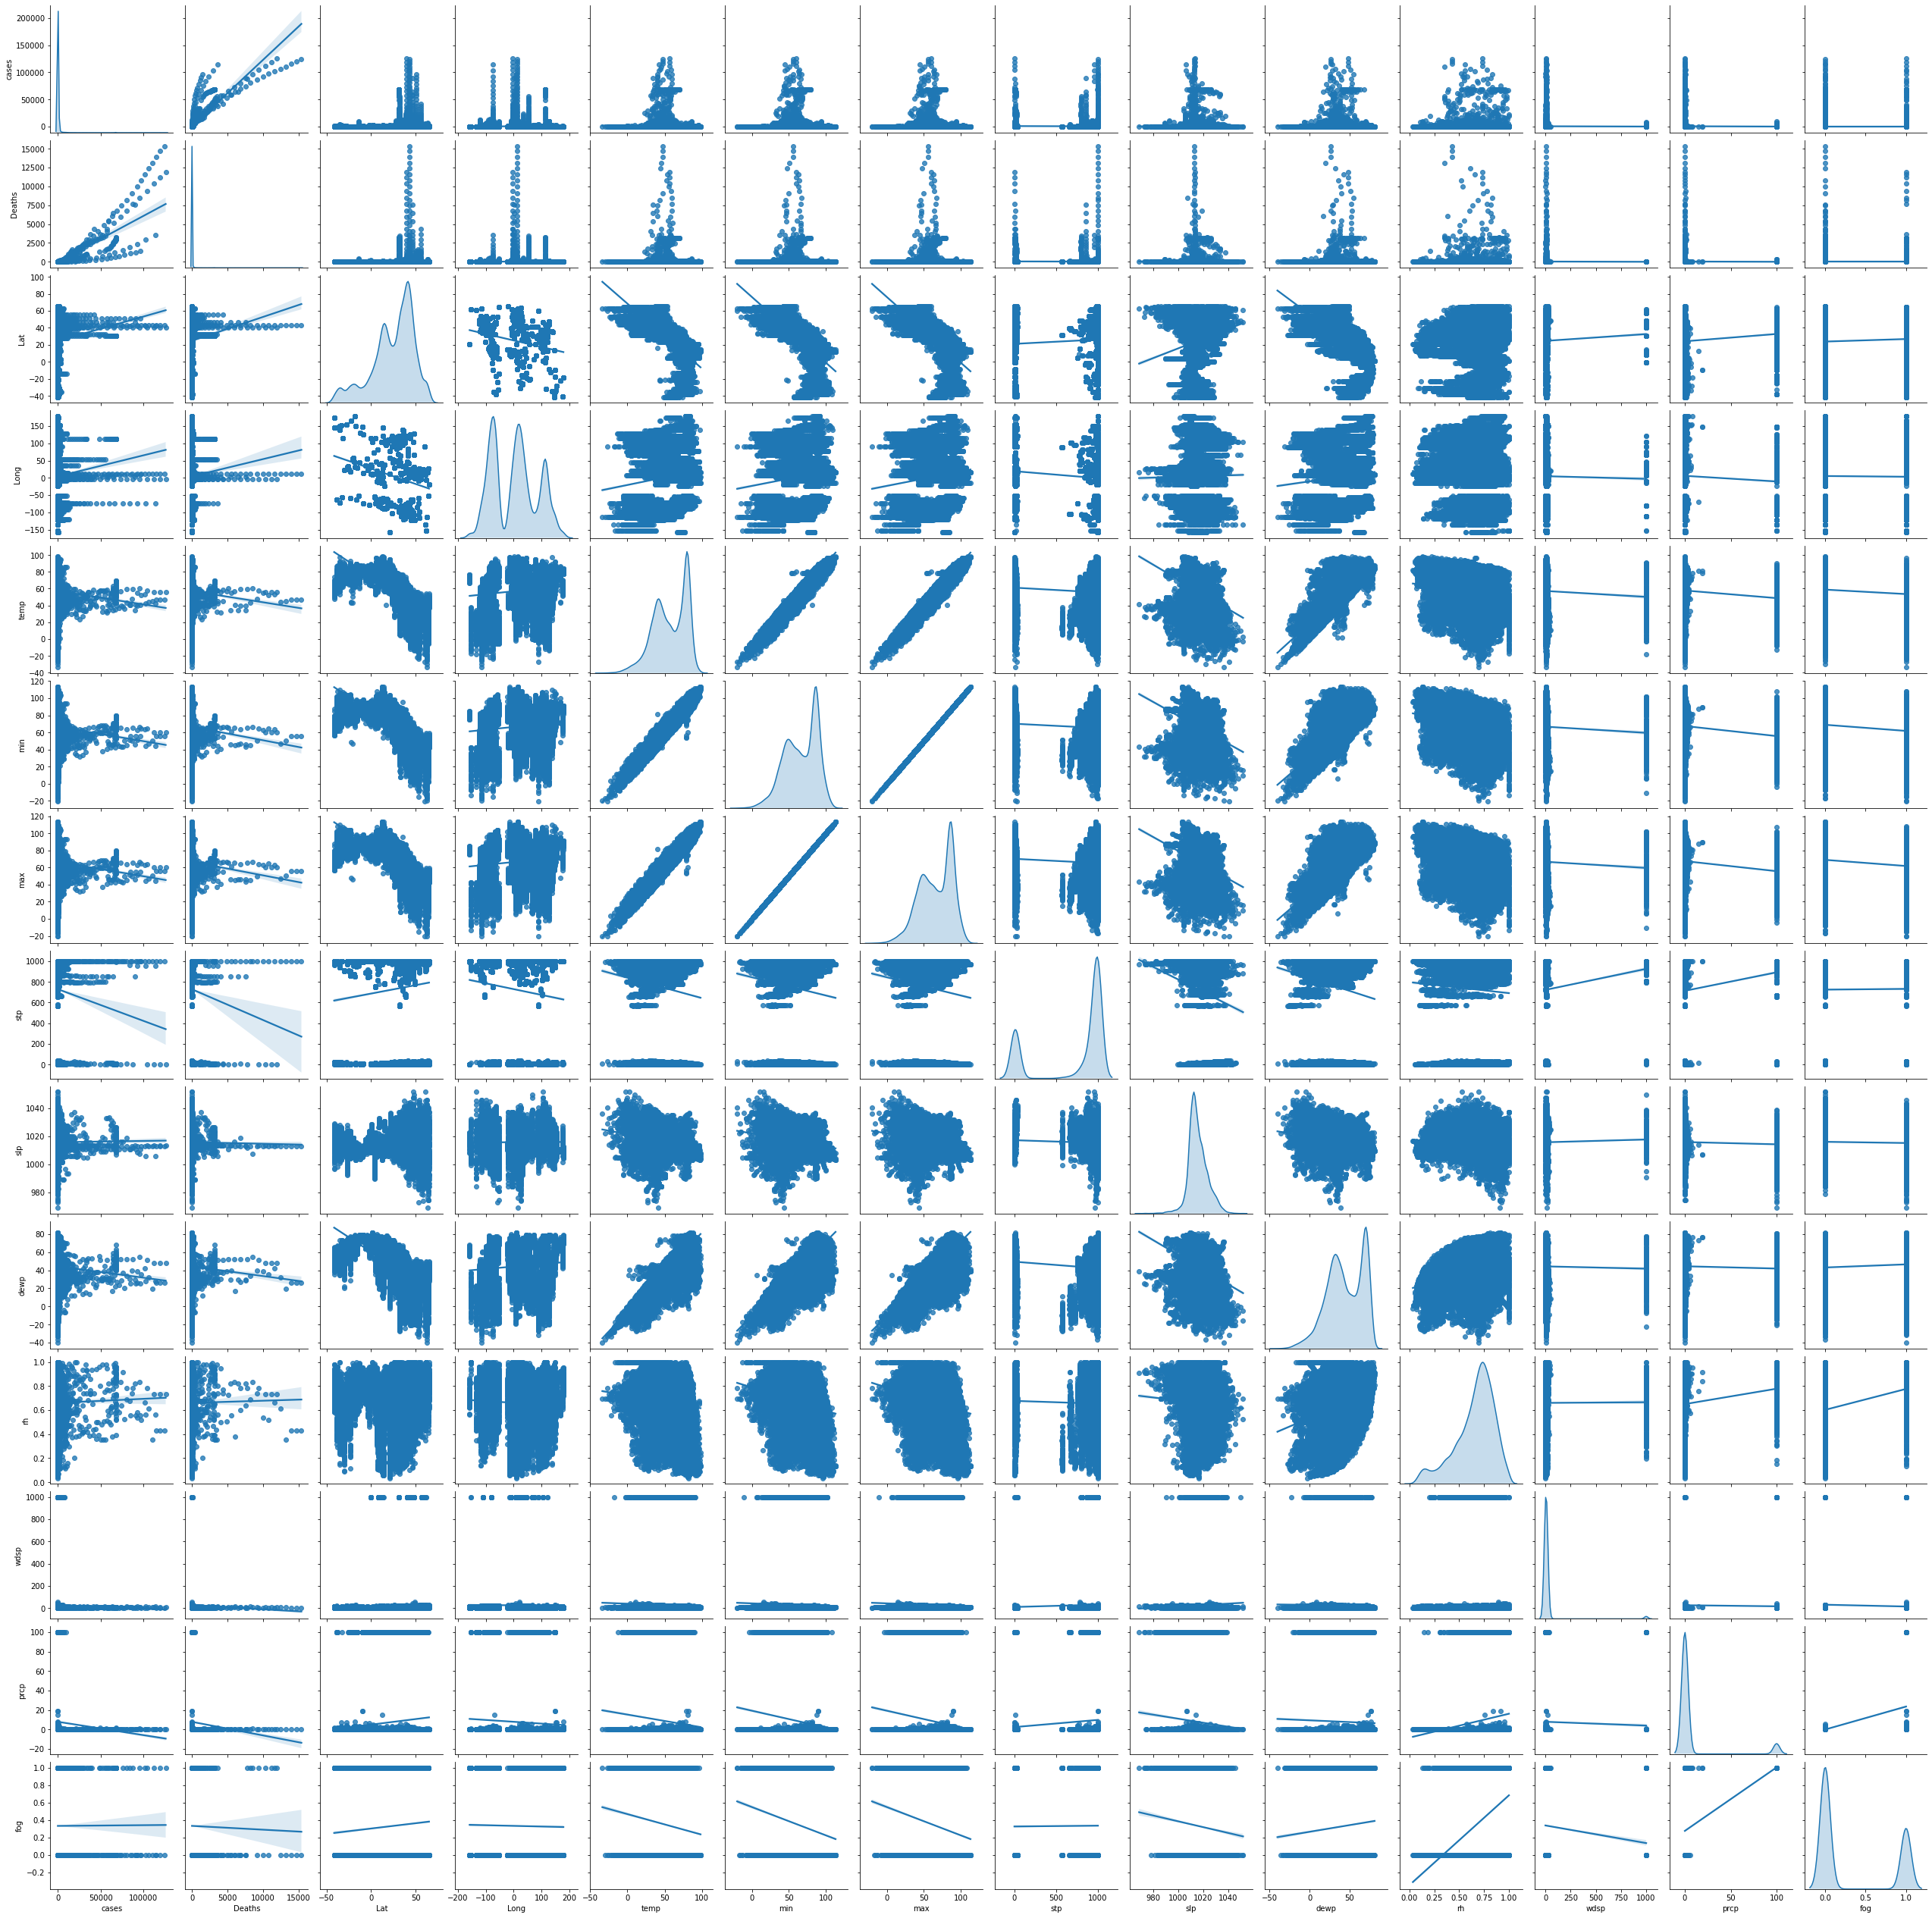

In [11]:
sns.pairplot(df,kind="reg",diag_kind="kde")

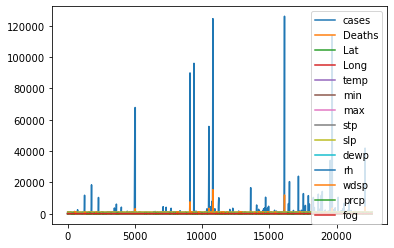

In [12]:
df.plot()

# Feature extraction and learning :

In [13]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,cases,Deaths,Lat,Long,temp,min,max,stp,slp,dewp,rh,wdsp,prcp,fog
cases,1.000000,0.865458,0.066687,0.041812,-0.038896,-0.041307,-0.041307,-0.039863,0.006564,-0.030285,0.009519,-0.012411,-0.027759,0.000948
Deaths,0.865458,1.000000,0.046198,0.024105,-0.022958,-0.027249,-0.027249,-0.027295,-0.005645,-0.018255,0.003580,-0.010370,-0.019986,-0.003546
Lat,0.066687,0.046198,1.000000,-0.261161,-0.731794,-0.733927,-0.733927,0.090998,0.185441,-0.672425,0.050673,0.046072,0.099431,0.060184
Long,0.041812,0.024105,-0.261161,1.000000,0.124521,0.117103,0.117103,-0.106723,0.010685,0.094475,-0.059530,-0.012934,-0.055558,-0.012424
temp,-0.038896,-0.022958,-0.731794,0.124521,1.000000,0.976188,0.976188,-0.105407,-0.297658,0.872724,-0.124527,-0.042422,-0.109028,-0.112120
min,-0.041307,-0.027249,-0.733927,0.117103,0.976188,1.000000,1.000000,-0.093494,-0.277062,0.811066,-0.219888,-0.043508,-0.142002,-0.152420
max,-0.041307,-0.027249,-0.733927,0.117103,0.976188,1.000000,1.000000,-0.093494,-0.277062,0.811066,-0.219888,-0.043508,-0.142002,-0.152420
stp,-0.039863,-0.027295,0.090998,-0.106723,-0.105407,-0.093494,-0.093494,1.000000,-0.110158,-0.134413,-0.049302,0.065167,0.115016,0.008043
slp,0.006564,-0.005645,0.185441,0.010685,-0.297658,-0.277062,-0.277062,-0.110158,1.000000,-0.274532,-0.049009,0.035424,-0.058236,-0.053379
dewp,-0.030285,-0.018255,-0.672425,0.094475,0.872724,0.811066,0.811066,-0.134413,-0.274532,1.000000,0.328751,-0.014906,-0.029986,0.072689


In [14]:
df.corr()[['cases']].sort_values('cases')

,cases
min,-0.041307
max,-0.041307
stp,-0.039863
temp,-0.038896
dewp,-0.030285
prcp,-0.027759
wdsp,-0.012411
fog,0.000948
slp,0.006564
rh,0.009519


In [15]:
indexNames = df[ (df['cases'] < 1) & (df['Deaths'] < 1) ].index
 
df.drop(indexNames , inplace=True)

In [16]:
df.to_csv('see.csv')

In [17]:
# scaler = StandardScaler() 

In [18]:
df=df[[ 'Deaths','cases','Lat','Long','temp','min','max','stp','slp','dewp','rh','wdsp','prcp','fog']]
df.head()

,Deaths,cases,Lat,Long,temp,min,max,stp,slp,dewp,rh,wdsp,prcp,fog
33,0.0,1.0,33.0,65.0,40.0,48.0,48.0,778.4,1015.9,32.7,0.748905,4.0,0.47,1
34,0.0,1.0,33.0,65.0,40.2,47.5,47.5,778.1,1015.4,28.2,0.618933,5.8,0.00,1
35,0.0,1.0,33.0,65.0,46.7,55.9,55.9,775.4,1008.4,28.2,0.482121,6.2,0.00,1
36,0.0,1.0,33.0,65.0,39.3,48.0,48.0,772.6,1008.7,33.4,0.791610,5.8,1.57,1
37,0.0,1.0,33.0,65.0,36.5,44.8,44.8,773.4,1011.4,29.9,0.767225,2.8,0.47,1


# Preparing the model (splitting ) :

In [19]:
x=df.iloc[:,1:]
y=df.iloc[:,0:1] 



In [20]:
data_dmatrix = xgb.DMatrix(data=x,label=y)

In [21]:
x.describe()

,cases,Lat,Long,temp,min,max,stp,slp,dewp,rh,wdsp,prcp,fog
count,10679.000000,10679.000000,10679.000000,10679.000000,10679.000000,10679.000000,10679.000000,10679.000000,10679.000000,10679.000000,10679.000000,10679.000000,10679.000000
mean,1389.443394,27.078644,30.008884,55.936286,65.513414,65.513414,715.417605,1016.560695,42.737467,0.649690,23.805515,6.982872,0.333926
std,7840.400486,22.581837,81.083604,20.678534,20.532123,20.532123,418.896386,7.563341,21.573793,0.195783,131.083652,25.345567,0.471636
min,1.000000,-41.454500,-157.498300,-27.200000,-20.200000,-20.200000,0.000000,968.900000,-33.100000,0.035440,0.000000,0.000000,0.000000
25%,8.000000,16.000000,-56.027800,40.900000,50.000000,50.000000,27.450000,1011.522419,28.600000,0.535005,3.600000,0.000000,0.000000
50%,68.000000,32.000000,30.000000,55.300000,65.700000,65.700000,978.600000,1015.500000,42.000000,0.684073,5.400000,0.000000,0.000000
75%,345.000000,42.165700,108.870100,74.500000,83.500000,83.500000,999.900000,1021.200000,62.000000,0.791796,8.200000,0.030000,1.000000
max,126168.000000,64.963100,178.450000,98.000000,113.200000,113.200000,999.900000,1045.900000,81.200000,1.000000,999.900000,99.990000,1.000000


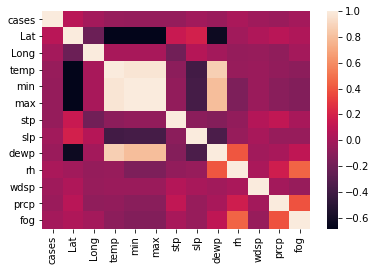

In [22]:
sns.heatmap(x.corr())  # to check for excess corelation and maybe use PCA?

In [23]:
# x=scaler.fit_transform(x)
# y=scaler.fit_transform(y)

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state =0) #random_state=123

# The prediction  function : 

In [25]:
# # worst of the all model
# poly_features = PolynomialFeatures(degree=3)  # use degree=3 <------------------------------------------------------------------
  
#  # converting linear features to polynomial features
# # xp_train = poly_features.fit_transform(x_train)
# # xp_test=poly_features.fit_transform(x_test)
  
#   # Fitting training data  
# poly_model = Lasso(alpha=0.01,normalize=False,max_iter=100000) # change to False <-----------------------------------------------------

# poly_model.fit(x_train, y_train)

#   # predicting training and testing data    
# y_train_pred= poly_model.predict(x_train)
# y_test_pred = poly_model.predict(x_test)
    
#   # performance evaluation of training data
# r2_train = r2_score(y_train, y_train_pred)
# rmse_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
# mae_train=mean_absolute_error(y_train,y_train_pred)
  
# print("The model performance for the training set")
# print("-------------------------------------------")
# print("R2 score of training set is = ",r2_train)
# print("RMSE on training set is = ",rmse_train)  
# print("MAE on training set is = ",mae_train)
  
#   # training set plotting
# # for i in range(0,xp_train.shape[1]):
# #     plt.scatter(xp_train[:,i:i+1],y_train) 
# # plt.plot(xp_train,y_train_pred,color='blue')
# # plt.title('Training')
# # plt.show()
  
#   # performance evaluation of testing data
# r2_test = r2_score(y_test, y_test_pred)
# rmse_test=np.sqrt(mean_squared_error(y_test, y_test_pred))
# mae_test=mean_absolute_error(y_test, y_test_pred)     
  
# print("\n")  
# print("The model performance for the test set")
# print("-------------------------------------------")
# print("R2 score of test set is = ",r2_test)
# print("RMSE on testing set is = ",rmse_test)
# print("MAE on testing set is = ",mae_test)
 
#   # testing set plotting  
# # for i in range(0,xp_test.shape[1]):
# #     plt.scatter(xp_test[:,i:i+1],y_test) 
# # plt.plot(xp_test,y_test_pred,color='blue')
# # plt.title('Testing')
# # plt.show()
  
#   # m and c of y=mx+c
# # m=poly_model.coef_
# # c=poly_model.intercept_  
# # print("The slope =",m.mean(),"\n The intercept =",c)

#   # Cross validation and evaluation 
# cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0) #<-----------------------------------------------------------------------------
# cv_result=cross_val_score(poly_model, x, y, cv=cv)
# print('\n Result of CV =',cv_result.mean()*100)  
  

In [26]:
# # 3rd best result so far:
# dectree_reg = tree.DecisionTreeRegressor()

# dectree_reg.fit(x_train,y_train)

# y_train_pred=dectree_reg.predict(x_train)
# y_test_pred=dectree_reg.predict(x_test)

# cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0) #<-----------------------------------------------------------------------------
# cv_result=cross_val_score(dectree_reg, x, y, cv=cv)
# print('\n Result of CV =',cv_result.mean()*100)  

# r2_train = r2_score(y_train, y_train_pred)
# rmse_train=np.sqrt(mean_squared_error(y_train, y_train_pred))
# mae_train=mean_absolute_error(y_train, y_train_pred)

# print("The model performance for the training set")
# print("-------------------------------------------")
# print("R2 score of training set is {}".format(r2_train))
# print("RMSE on training set is {}".format(rmse_train))  
# print("MAE on training set is {}".format(mae_train))


# r2_test = r2_score(y_test, y_test_pred)
# rmse_test=np.sqrt(mean_squared_error(y_test, y_test_pred))
# mae_test=mean_absolute_error(y_test, y_test_pred) 

# print('\n')
  
# print("The model performance for the testing set")
# print("-------------------------------------------")
# print("R2 score of testing set is {}".format(r2_test))
# print("RMSE on testing set is {}".format(rmse_test))  
# print("MAE on testing set is {}".format(mae_test)) 


In [27]:
# #2nd best
# regr = RandomForestRegressor()

# yr_train=y_train.values.ravel()

# regr.fit(x_train,yr_train)

# y_train_pred=regr.predict(x_train)
# y_test_pred=regr.predict(x_test)

# cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0) #<-----------------------------------------------------------------------------
# cv_result=cross_val_score(regr, x, y, cv=cv)
# print('\n Result of CV =',cv_result.mean()*100)  

# r2_train = r2_score(y_train, y_train_pred)
# rmse_train=np.sqrt(mean_squared_error(y_train, y_train_pred))
# mae_train=mean_absolute_error(y_train, y_train_pred)

# print("The model performance for the training set")
# print("-------------------------------------------")
# print("R2 score of training set is {}".format(r2_train))
# print("RMSE on training set is {}".format(rmse_train))  
# print("MAE on training set is {}".format(mae_train))


# r2_test = r2_score(y_test, y_test_pred)
# rmse_test=np.sqrt(mean_squared_error(y_test, y_test_pred))
# mae_test=mean_absolute_error(y_test, y_test_pred) 

# print('\n')
  
# print("The model performance for the testing set")
# print("-------------------------------------------")
# print("R2 score of testing set is {}".format(r2_test))
# print("RMSE on testing set is {}".format(rmse_test))  
# print("MAE on testing set is {}".format(mae_test)) 



In [28]:
# best scores so far

xg_reg = xgb.XGBRegressor(n_estimators = 1000)
xg_reg.fit(x_train,y_train)

y_train_pred=xg_reg.predict(x_train)
y_test_pred=xg_reg.predict(x_test)

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0) #<-----------------------------------------------------------------------------
cv_result=cross_val_score(xg_reg, x, y, cv=cv)
print('\n Result of CV =',cv_result.mean()*100)  

r2_train = r2_score(y_train, y_train_pred)
rmse_train=np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train=mean_absolute_error(y_train, y_train_pred)

print("The model performance for the training set")
print("-------------------------------------------")
print("R2 score of training set is {}".format(r2_train))
print("RMSE on training set is {}".format(rmse_train))  
print("MAE on training set is {}".format(mae_train))

r2_test = r2_score(y_test, y_test_pred)
rmse_test=np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test=mean_absolute_error(y_test, y_test_pred) 

print('\n')
  
print("The model performance for the testing set")
print("-------------------------------------------")
print("R2 score of testing set is {}".format(r2_test))
print("RMSE on testing set is {}".format(rmse_test))  
print("MAE on testing set is {}".format(mae_test)) 




 Result of CV = 91.74724311554229
The model performance for the training set
-------------------------------------------
R2 score of training set is 0.9999999926566068
RMSE on training set is 0.04635838685925855
MAE on training set is 0.023917159664537398


The model performance for the testing set
-------------------------------------------
R2 score of testing set is 0.9769471554999449
RMSE on testing set is 92.03762383686025
MAE on testing set is 12.174575679129765


C:\Program Files\Python38\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Program Files\Python38\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


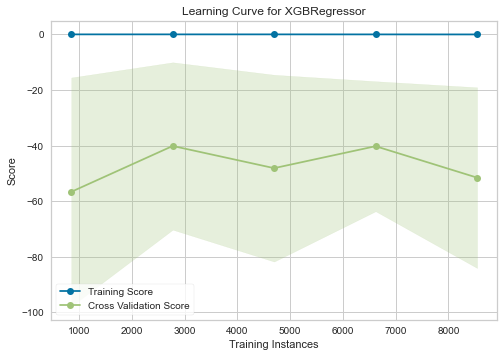

In [29]:
from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(xg_reg, scoring='neg_mean_absolute_error')
visualizer.fit(x, y)        # Fit the data to the visualizer
visualizer.show() 

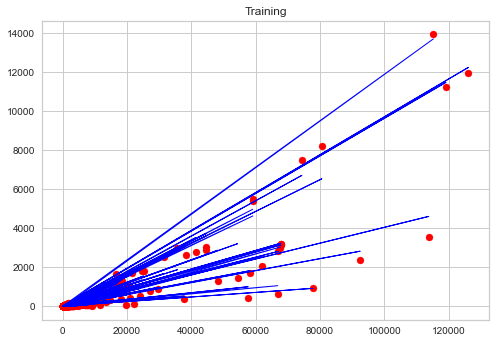

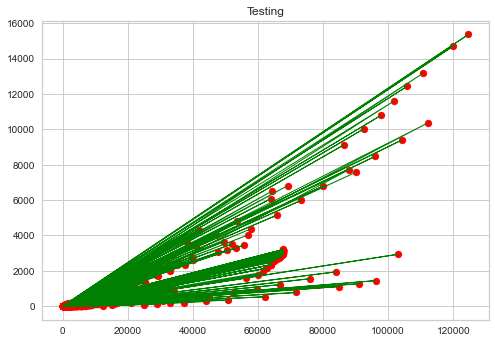

In [30]:
#testing set plotting  
plt.scatter(x_test.iloc[:,0:1], y_test.iloc[:,0:1],  color='red')
plt.plot(x_test.iloc[:,0:1], y_test_pred, color='blue', linewidth=1)
plt.title('Testing')
plt.show()

 # testing set plotting  
plt.scatter(x_train.iloc[:,0:1], y_train.iloc[:,0:1],  color='red')
plt.plot(x_train.iloc[:,0:1], y_train_pred, color='green', linewidth=1)
plt.title('Training')
plt.show()

In [31]:
# sklearn.metrics.SCORERS.keys()

# Predicting :

In [32]:
x_delhi=pd.read_csv('delhi_op.csv')

In [33]:
x_delhi.head()

,cases,Lat,Long,temp,min,max,stp,slp,dewp,rh,wdsp,prcp,fog
0,3314,28.7041,77.1025,91.4,86,96.8,1006,1003,63,0.5,5,0,0


In [34]:
y_delhi_pred=xg_reg.predict(x_delhi)

In [35]:
print('The number of death in Delhi due to COVID 19  = {}'.format(int(y_delhi_pred)))

The number of death in Delhi due to COVID 19  = 63
